# PHASE 1: ASK
## Business task:
* Bellabeat needs to analyze trends in fitness smart devices usage of non-Bellabeat users. Apply this finding into one of Bellabeat product then make high-level recommendation for Bellabeat marketing strategy.

## Key stakeholders:
* Urska Srsen: CEO
* Sando Mur: Mathematician and co-founder of Bellabeat
* Bellabeat marketing analytics team

## Questions:
* What attributes do people use their devices to track?
* What relationships could we find to better understand customers' habits.
    * What factors contribute to burning calories (losing weight)
* What do *customers of Bellabeat* want? (Female)
    * E.g. burn more calories, get better sleep, etc.
* How could we intergrate our findings with what our customers want?
* 

# PHASE 2: PREPARE
## Data source: 
* FitBit Fitness Tracker Data:
    * Public Domain 
    * Contains data from 30 eligible fitbit users who are all consented to the submission of personal data, including **minute-level** output for **physical activities, heart rate, and sleep monitoring**. It also includes information about **daily activities, steps, and heart rates**. 
    * This dataset can answer questions of how non-Bellabeat users use their smart fitness devices.
    * Limitation: Most of Bellabeat customers are *females* while this dataset might contain *mixed genders* information, which might not reflect what Bellabeat needs to do.
## Data credibility:
* The data is from FitBit Fitness Tracker Data and made public on reliable platform: Zenodo.org. Thus, it is safe to use this data to determine the habits of FitBit users. It contains several tables that record different level of acitivities, such as heart rate, calories burned, and sleep. 

## Sort and filter:
* Although the database contains minute-level of tracking, I will just focus on daily records since I want to determine the trends in usage by users not detailed of perfomance. With that said, I will emerge tables that contain daily records of activities, calories, steps, intensities, and sleep.

In [1]:
#Importing important libraries for cleaning and analysis.
import pandas as pd                 # Pandas library is used to deal with dataframe.
import numpy as np                  # Numpy library is used to deal with numeric values and concepts, such as Null/NaN.
import matplotlib.pyplot as plt     # Pyplot is a function is matplotlib library that is used to draw charts.
import seaborn as sns               # seaborn library is also used to draw charts that pyplot cannot, such as pie.


In [2]:
#Importing the data
daily_activity = pd.read_csv('dailyActivity_merged.csv')
daily_calories = pd.read_csv('dailyCalories_merged.csv')
daily_intensities = pd.read_csv('dailyIntensities_merged.csv')
daily_steps = pd.read_csv('dailySteps_merged.csv')
daily_sleep = pd.read_csv('sleepDay_merged.csv')
weight_log = pd.read_csv('weightLogInfo_merged.csv')


In [3]:
#Have a look at the data we imported.
act_sum = daily_activity.describe().transpose()
cal_sum = daily_calories.describe().transpose()
intense_sum = daily_intensities.describe().transpose()
step_sum = daily_steps.describe().transpose()
sleep_sum = daily_sleep.describe().transpose()
weight_sum = weight_log.describe().transpose()

print(act_sum.head(5))
print(cal_sum.head(5))
print(intense_sum.head(5))
print(step_sum.head(5))
print(sleep_sum.head())
print(weight_sum.head())

                          count          mean           std           min  \
Id                        940.0  4.855407e+09  2.424805e+09  1.503960e+09   
TotalSteps                940.0  7.637911e+03  5.087151e+03  0.000000e+00   
TotalDistance             940.0  5.489702e+00  3.924606e+00  0.000000e+00   
TrackerDistance           940.0  5.475351e+00  3.907276e+00  0.000000e+00   
LoggedActivitiesDistance  940.0  1.081709e-01  6.198965e-01  0.000000e+00   

                                   25%           50%           75%  \
Id                        2.320127e+09  4.445115e+09  6.962181e+09   
TotalSteps                3.789750e+03  7.405500e+03  1.072700e+04   
TotalDistance             2.620000e+00  5.245000e+00  7.712500e+00   
TrackerDistance           2.620000e+00  5.245000e+00  7.710000e+00   
LoggedActivitiesDistance  0.000000e+00  0.000000e+00  0.000000e+00   

                                   max  
Id                        8.877689e+09  
TotalSteps                3.601900

# PHASE 3: PROCESS
## Tools:
* I used Python for processing data instead of R because I actually learned Python for DS before taking the Google DA course. I prefer Python because I'm more comfortable with it. The only downside is sometimes it takes more lines of code to get something in Python that just needs 1 line in R. 

## Summary:
*  I noticed that the most of the tables contain 940 records and the daily_activity actually has many attributes of other tables, so I suspect there are overlapping data between tables. Thus, I decided to investigate to see whether some tables are just a part of the other. It turned out daily_activity contains all records of other tables, except daily_sleep and weight_log. However, daily_sleep and weight_log do not contain the same number of records, especially weight_log contain only 67 records compare to 940. I decided to merge daily_activity and daily_sleep into a new table and drop any missing records so I can track the relationship between sleep and activity.

* Moreover, I noticed that the minimum calories burned recorded was 0, and maximum sedentary was 24 hours. After investigation, I found out that even when sedentary time was 24 hours, some rows still have calories-burned recorded. Hence, I believe such data (0 calories-burned) was not valid and removed them from the table. I supposed it's the recorded data when people didn't wear their fitbit devices, which would greatly impact my analysis for how people use their devices.

* The weight_log table contains many problems, so I will leave it out of analysis.

In [4]:
# Investigating to see whether some tables are just a part of the other.

df_match = pd.DataFrame({'Match': []})          #Create a dataframe to compare values of attribute between 2 tables
df_match['Match'] = np.where
(daily_activity['Calories'] == daily_calories['Calories'], True, False) #Set condition to compare records between 2 tables. If they match then return True, False otherwise.
print(df_match['Match'].unique())               #Check to see whether the record contains any different values. If True is the only value then 2 tables match completely

#The process repeats and compare daily_activity with other tables. 
#In conclusion, the daily_activity contains all records of other tables except daily_sleep. Thus, I decide to join these 2 together.

[]


In [5]:
# Let's look at records with 24 hours sedentary
max_sedentary = daily_activity[daily_activity['SedentaryMinutes'] == 1440].reset_index()

print(max_sedentary[['Id','SedentaryMinutes','Calories']])

# Here, we see that even people with 1440 minutes (24 hours) sedentary, they still have their calories-burn recorded. With that said, 0 calories-burn
# records were invalid since that's only possible when people didn't wear their fitbit devices. So let's remove them from the table

print(daily_activity[daily_activity['Calories'] == 0].reset_index()[['Id','Calories']]) # Let's have a look at number of records with 0 calories

# There are only 4/940 records by 4 different users. Hence removing them should be fine
# Let's remove the invalid data
daily_activity = daily_activity[daily_activity['Calories'] != 0]


            Id  SedentaryMinutes  Calories
0   1503960366              1440         0
1   1844505072              1440      1347
2   1844505072              1440      1347
3   1844505072              1440      1347
4   1844505072              1440      1348
..         ...               ...       ...
74  8792009665              1440      1688
75  8792009665              1440      1688
76  8792009665              1440      1688
77  8792009665              1440      1688
78  8792009665              1440      1688

[79 rows x 3 columns]
           Id  Calories
0  1503960366         0
1  6290855005         0
2  8253242879         0
3  8583815059         0


In [6]:
# Let's add another attribute to the daily_activity table: Total active time

daily_activity['total_active_minutes'] = 1440 - daily_activity['SedentaryMinutes']

In [7]:
# Let's group the records daily_activity into 4 active levels: 
# most active, moderately active, lightly active, and sedentary based on their total active minutes.
x = daily_activity['total_active_minutes']
daily_activity['active_level'] = np.where(
                                        x > np.quantile(x, 0.75),
                                        'Most active',
                                        np.where(
                                            x > np.quantile(x, 0.5),
                                            'Moderately active',
                                            np.where(
                                                x > np.quantile(x,0.25),
                                                'Lightly active',
                                                'Sedentary'))
                                        )

# Merging  tables together. The daily_activity and daily_sleep table actually has a different name for date attribute. 
# Moreover, daily_sleep contains time in the same column, so I will split it.
daily_sleep['ActivityDate'] = daily_sleep['SleepDay'].str[:9]

daily_sleep = daily_sleep.drop('SleepDay', axis = 1) # Drop the sleep day attribute

daily_records = daily_activity.merge(daily_sleep, how = 'outer', on = ['Id', 'ActivityDate']).dropna()

# Here I joined the 2 tables together and drop any rows with missing values.

In [8]:
daily_records.head() # Recheck the table
daily_records.dtypes # Notice that ActivityDate is object state. We want them in datetime type to perform analysis
daily_records['ActivityDate'] = pd.to_datetime(daily_records['ActivityDate']) # Transform the datatype of ActivityDate to datetime


In [9]:

print(daily_records.dtypes)
daily_records.head()


Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                         float64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                  float64
FairlyActiveMinutes                float64
LightlyActiveMinutes               float64
SedentaryMinutes                   float64
Calories                           float64
total_active_minutes               float64
active_level                        object
TotalSleepRecords                  float64
TotalMinutesAsleep                 float64
TotalTimeInBed                     float64
dtype: object


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_active_minutes,active_level,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,712.0,Most active,1.0,327.0,346.0
1,1503960366,2016-04-13,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,664.0,Moderately active,2.0,384.0,407.0
3,1503960366,2016-04-15,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,714.0,Most active,1.0,412.0,442.0
4,1503960366,2016-04-16,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,667.0,Moderately active,2.0,340.0,367.0
5,1503960366,2016-04-17,9705.0,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0,901.0,Most active,1.0,700.0,712.0


In [10]:
# Now let's move to the weight log
weight_log.head()
weight_log['Date_norm'] = pd.to_datetime(weight_log['Date'], format= '%m/%d/%Y %I:%M:%S %p') # Format the date from 12-hour to 24-hour

weight_log_group = weight_log.groupby('Id')
weight_log_group.first()

,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Date_norm
Id,,,,,,,,
1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000,2016-05-02 23:59:59
1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000,2016-04-13 01:08:52
2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000,2016-04-21 23:59:59
4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,25.0,27.450001,True,1460937599000,2016-04-17 23:59:59
4558609924,4/18/2016 11:59:59 PM,69.699997,153.662190,NaN,27.250000,True,1461023999000,2016-04-18 23:59:59
5577150313,4/17/2016 9:17:55 AM,90.699997,199.959265,NaN,28.000000,False,1460884675000,2016-04-17 09:17:55
6962181067,4/12/2016 11:59:59 PM,62.500000,137.788914,NaN,24.389999,True,1460505599000,2016-04-12 23:59:59
8877689391,4/12/2016 6:47:11 AM,85.800003,189.156628,NaN,25.680000,False,1460443631000,2016-04-12 06:47:11


In [11]:

# Let's create our weight_log dataframe for analysis
id = weight_log['Id'].unique()
first_day = weight_log_group['Date_norm'].first().values
last_day = weight_log_group['Date_norm'].last().values
days_between = last_day - first_day
weight_before =  weight_log_group['WeightKg'].first().values
weight_after = weight_log_group['WeightKg'].last().values
weight_change = weight_after - weight_before
total_records = weight_log_group['Id'].count().values
num_manual = weight_log_group['IsManualReport'].sum().values


weight = pd.DataFrame({'id': id,
                        'first_day':first_day,
                        'last_day':last_day,
                        'days_between':days_between,
                        'weight_before': weight_before,
                        'weight_after': weight_after,
                        'weight_change_kg':weight_change,
                        'total_records':total_records,
                        'num_manual':num_manual
                        })

weight



,id,first_day,last_day,days_between,weight_before,weight_after,weight_change_kg,total_records,num_manual
0,1503960366,2016-05-02 23:59:59,2016-05-03 23:59:59,1 days 00:00:00,52.599998,52.599998,0.000000,2,2
1,1927972279,2016-04-13 01:08:52,2016-04-13 01:08:52,0 days 00:00:00,133.500000,133.500000,0.000000,1,0
2,2873212765,2016-04-21 23:59:59,2016-05-12 23:59:59,21 days 00:00:00,56.700001,57.299999,0.599998,2,2
3,4319703577,2016-04-17 23:59:59,2016-05-04 23:59:59,17 days 00:00:00,72.400002,72.300003,-0.099998,2,2
4,4558609924,2016-04-18 23:59:59,2016-05-09 23:59:59,21 days 00:00:00,69.699997,69.099998,-0.599998,5,5
5,5577150313,2016-04-17 09:17:55,2016-04-17 09:17:55,0 days 00:00:00,90.699997,90.699997,0.000000,1,0
6,6962181067,2016-04-12 23:59:59,2016-05-12 23:59:59,30 days 00:00:00,62.500000,61.900002,-0.599998,30,30
7,8877689391,2016-04-12 06:47:11,2016-05-12 06:42:53,29 days 23:55:42,85.800003,84.000000,-1.800003,24,0


There are many problems with this table. 
* 1st, there are only data of 8 candidates, which is far below the minimum requirement (30). The sample is too tiny for me to draw any conclusion
* 2nd, most of the data records were performed by 2 users (Look at total records). 
* 3rd, 3/8 records were either recorded only once or the days between records were too closed, leaving only 5 reliable records.

I need to collect more data for a bigger sample size or find another dataset. For now, I will have to leave the weight analysis out.

# PHASE 4: ANALYSIS
## Objectives:
* Find interesting insights of the data
* Find the relationship between total steps vs. sleep time. I suspected that the more people walk the longer they sleep (Or better sleep) due to tiredsome. 
* Determine the relationship between total steps and type of activities. From there, determine whether type of activities or total steps is the key factor to burning the most calories.




In [12]:
# Summary statistics of daily_activities. This is important since daily_records drop rows that don't record sleep data.
daily_activity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,936.0,4.849841e+09,2.421440e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,936.0,7.670551e+03,5.073379e+03,0.000000e+00,3.818000e+03,7.441000e+03,1.073350e+04,3.601900e+04
TotalDistance,936.0,5.513162e+00,3.916497e+00,0.000000e+00,2.645000e+00,5.265000e+00,7.720000e+00,2.803000e+01
TrackerDistance,936.0,5.498750e+00,3.899143e+00,0.000000e+00,2.645000e+00,5.265000e+00,7.712500e+00,2.803000e+01
LoggedActivitiesDistance,936.0,1.086332e-01,6.211806e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
VeryActiveDistance,936.0,1.509103e+00,2.662802e+00,0.000000e+00,0.000000e+00,2.200000e-01,2.090000e+00,2.192000e+01
ModeratelyActiveDistance,936.0,5.699679e-01,8.846865e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
LightActiveDistance,936.0,3.355096e+00,2.033258e+00,0.000000e+00,1.960000e+00,3.380000e+00,4.790000e+00,1.071000e+01
SedentaryActiveDistance,936.0,1.613248e-03,7.361120e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,936.0,2.125534e+01,3.288574e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


In [13]:
#Group the records together by user Id by average.
avg_user_records = daily_records.groupby('Id').mean().reset_index()
avg_user_records.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Id,24.0,4.763820e+09,2.288233e+09,1.503960e+09,2.340408e+09,4.501862e+09,6.822462e+09,8.792010e+09
TotalSteps,24.0,7.978735e+03,3.717931e+03,1.490000e+03,4.883788e+03,8.831605e+03,1.009190e+04,1.873350e+04
TotalDistance,24.0,5.663865e+00,2.890341e+00,1.032000e+00,3.095625e+00,6.133807e+00,7.311875e+00,1.469000e+01
TrackerDistance,24.0,5.660039e+00,2.888787e+00,1.032000e+00,3.095625e+00,6.133807e+00,7.311875e+00,1.469000e+01
LoggedActivitiesDistance,24.0,5.994462e-02,2.359328e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.126541e+00
VeryActiveDistance,24.0,1.405070e+00,2.336471e+00,0.000000e+00,1.555861e-01,5.597619e-01,1.690864e+00,1.106000e+01
ModeratelyActiveDistance,24.0,6.249141e-01,6.060906e-01,0.000000e+00,1.222039e-01,5.432380e-01,8.221042e-01,2.308000e+00
LightActiveDistance,24.0,3.595397e+00,1.322064e+00,1.032000e+00,2.813899e+00,3.375909e+00,4.171647e+00,6.325833e+00
SedentaryActiveDistance,24.0,9.532828e-04,3.277615e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.333333e-02
VeryActiveMinutes,24.0,2.189345e+01,3.034579e+01,0.000000e+00,2.502392e+00,9.766667e+00,2.552273e+01,1.070000e+02


The reason why I grouped the records together by ID is to avoid some unusual records that could affect the stats overall. Also, by grouping the records together, we could see how each person perform on average. However, this table only contains records of 24 users, which is below the minimum sample (30). This is due to the fact that there were only 24 users that recorded their sleep. So I will also group the daily_acitivity records by users and pull some interesting insights from the 3 tables.

In [14]:
# Let's group the daily_activity by ID
avg_daily_act = daily_activity.groupby('Id').mean().reset_index()
avg_daily_act.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,33.0,4.857201e+09,2.433765e+09,1.503960e+09,2.347168e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,33.0,7.555810e+03,3.586834e+03,9.161290e+02,5.566871e+03,7.438467e+03,9.519667e+03,1.604003e+04
TotalDistance,33.0,5.424996e+00,2.776708e+00,6.345161e-01,3.454839e+00,5.295333e+00,6.913548e+00,1.321290e+01
TrackerDistance,33.0,5.409660e+00,2.764064e+00,6.345161e-01,3.454839e+00,5.295333e+00,6.913548e+00,1.321290e+01
LoggedActivitiesDistance,33.0,1.101182e-01,4.124958e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.118673e+00
VeryActiveDistance,33.0,1.457064e+00,1.869744e+00,6.129032e-03,1.422581e-01,7.300000e-01,2.337222e+00,8.514839e+00
ModeratelyActiveDistance,33.0,5.601823e-01,5.392035e-01,1.129032e-02,1.296774e-01,5.022581e-01,7.732258e-01,2.751000e+00
LightActiveDistance,33.0,3.331625e+00,1.376438e+00,5.070968e-01,2.606774e+00,3.504516e+00,4.193214e+00,6.188710e+00
SedentaryActiveDistance,33.0,1.635243e-03,3.042318e-03,0.000000e+00,0.000000e+00,0.000000e+00,7.692308e-04,1.100000e-02
VeryActiveMinutes,33.0,2.039519e+01,2.382978e+01,9.677419e-02,3.580645e+00,1.038710e+01,2.341935e+01,8.733333e+01


# PHASE 5: SHARE
## Summary:
* I pulled some interesting insights from the summaries of 3 tables
* Made some plots to find correlation between some attributes to answer phase 4 objectives
* Noted down some useful ways to use insights to benefit the marketing campaign
* Noted some limitations of the dataset 


Here are some interesting insights I pulled from 2 tables:
* The maximum sedentary time is 1440 minutes (24 hours). The average sedentary time is ~998 minutes (About 16.5 hours).
* The average sleep time is 375 minutes (6.5 hours). One person can sleep up to 683 minutes (11+ hours).
* On average, people burn about 2292 kcal everyday. The highest calories-burn recorded was 4900 kcal.
* On average, people do 7555 steps everyday.
* On average, people do 20 minutes very-active, 19 minutes fairly-active, and 192 minutes lightly-active


In [15]:
# Let's make some functions
def trendline_maker(df,x,y, color = 'red'):
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    plt.plot(df[x], p(df[x]), color = color )

def scatterplot(data, x, y, xlabel, ylabel, title, legend_title = None, legend = 'auto',  hue = None):
    sns.scatterplot(x = x, y = y, data = data, hue = hue, legend = legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title=legend_title)
    


No handles with labels found to put in legend.


[[ 1.         -0.15111645]
 [-0.15111645  1.        ]]


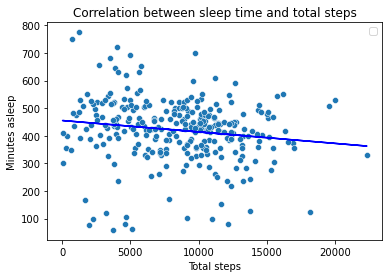

In [16]:
# Let's do some analysis on our 2nd objective, finding relationship between total steps and sleep time
scatterplot(data = daily_records,
            x = 'TotalSteps',
            y = 'TotalMinutesAsleep', 
            title = 'Correlation between sleep time and total steps',
            xlabel = 'Total steps',
            ylabel = 'Minutes asleep'
            )                                                                       # Draw the scatterplot 
trendline_maker(daily_records, 'TotalSteps', 'TotalMinutesAsleep', color = 'blue')                  # Draw the trend line
print(np.corrcoef(daily_records['TotalMinutesAsleep'],daily_records['TotalSteps'])) # Find the correlation coefficients


# In conclusion, there is no correlation between totals steps and total sleep time.

[[1.         0.57048954]
 [0.57048954 1.        ]]


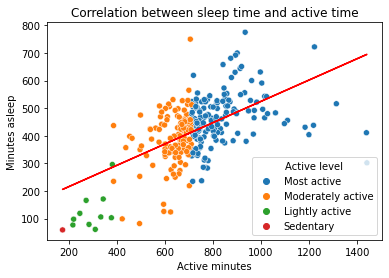

In [17]:
# Let's make a scatterplot to find correlation between total sleep time and total active time
# The reason why I dont use the users_record was because each user might have different active level between days.
# Hence, I will need to consider each individual record instead of the average by id.
scatterplot(data = daily_records,
            x = 'total_active_minutes',
            y = 'TotalMinutesAsleep', 
            title = 'Correlation between sleep time and active time',
            xlabel = 'Active minutes',
            ylabel = 'Minutes asleep',
            legend_title = 'Active level',
            hue = 'active_level'
            )  
trendline_maker(daily_records,'total_active_minutes', 'TotalMinutesAsleep')
print(np.corrcoef(daily_records['TotalMinutesAsleep'],daily_records['total_active_minutes']))

# We can conclude that there is a moderate positive correlation between sleep time and active levels. 


### Interesting insights and recommendation:
* There is a moderate positive correlation between active time and sleep time.
    * This might be a causation relationship since being active can make people worn-out.
* People who are lightly actve or sedentary are the ones that do not get enough sleep time. More over, people who are very active can get oversleeping too.
    * This can be explained that sedentary/lightly active people are not worn-out enough.
    * On the other hand, very active people are too tired and need more sleep.
    * According *Cleveland clinic organization*, too little sleep can lead to high blood pressure, diabetes, heart attack, heart failure, or stroke. On the other hand, oversleeping can cause heart diseases, diabetes, anxiety, and obesity, according to *Premier Health*. 

* At least 400 minutes of being active (doesn't matter the active level) can contribute to giving you 7-9 hours of sleep
    * We could use this information to encourage people to enjoy light activity (walking, preparing foods, etc.)
    * Of course there are other factors that affect sleep time overall (i.e stress level, hydration, etc.) 
        * This dataset does not contain enough information, so in order to get to know more about non-Bellabeat customers, I might have to find a more complete dataset.

[[ 1.         -0.09238581]
 [-0.09238581  1.        ]]


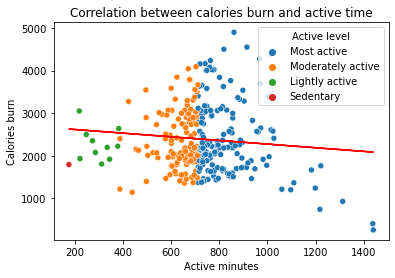

In [18]:
# Let's make another scatterplot to find correlation between active time and calories-burn
scatterplot(data = daily_records,
            x = 'total_active_minutes',
            y = 'Calories',
            hue = 'active_level',
            xlabel = 'Active minutes',
            ylabel = 'Calories burn',
            title = 'Correlation between calories burn and active time',
            legend_title = 'Active level')

trendline_maker(daily_records,'total_active_minutes', 'Calories')
print(np.corrcoef(daily_records['Calories'],daily_records['total_active_minutes']))



# Here, I can conclude that there is no correlation between active minutes and calories burn. It is very weird since I know that activity requires energy
# hence more active time should lead to more calories burn
# However, there are other factors that contribute to calories burn as well
# For instance, weight is one key factor to determine someone's BMR, which means the heavier you are the more calories you consume, even in sedentary
# Another factor is the type of activities. Heavy activities should consume more calories compares to light activities in the same ammount of time.
# That said, I need to approach this problem in a different way
# I'm thinking of either tracking the active level of each users between days to find the correlation since a person's BMR will not change drastically
# or maybe I could redefine the group of active-level based on type of activities (using attributes like VeryActiveMinutes, ModActiveMinutes, etc.)
# Or I could find the correlation between total steps and calories burned.

[[1.         0.58679797]
 [0.58679797 1.        ]]


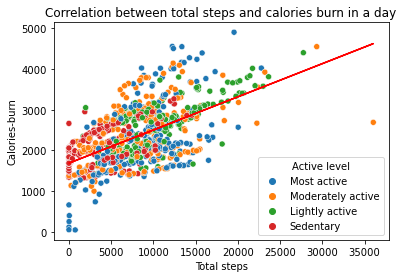

In [19]:
# Let's find the correlation between total steps and calories burn and separate the data by active levels.
# Let's use the daily_activity table for more records
scatterplot(data = daily_activity,
            x = 'TotalSteps',
            y = 'Calories',
            xlabel = 'Total steps',
            ylabel = 'Calories-burn',
            title = 'Correlation between total steps and calories burn in a day',
            legend_title = 'Active level',
            hue = 'active_level'
)
trendline_maker(daily_activity, 'TotalSteps', 'Calories')
print(np.corrcoef(daily_activity['TotalSteps'], daily_activity['Calories']))

# We can conclude that there is a moderate positive correlation between total steps and calories burn in a day. 
# This means the more someone walk, the more calories they use.

### Interesting insights and recommendation:
* Total steps is not related to active level. Most active records (based on sedentary time) can do very few steps. This kinda explain why we found no correlation between active levels and calories burn earlier.
    * Might have to find another method to regroup the sample.
    
* However, there is in fact correlation between total steps and calories burn. Since stepping requires energy, it's safe to say its a causation relationship.
    * Bellabeat could use this information to encourage people who aims to burn more calories to walk more.
    * Since Bellabeat's customers are mostly (if not all) female, who are often sensitive with controlling weights, this insight is very helpful

# PHASE 6: ACT

## Applying analysis to Bellabeat products:
### Key findings:
* Non-bellabeat users use their fitness smart devices to track sleep time, calories, steps, activity, and weight
* However, there are several data that isn't tracked like stress level
* The average sedentary time is ~998 minutes (About 16.5 hours).
    * According to *Healthy WA*, sitting more than 7 to 10 hours a day is bad for your health, even if you're doing enough physical activities
    * That said, Bellabeat could use this information to encourage people to exercise more, even lightly like walking, to avoid health issues.
* The average sleep time is 375 minutes (6.5 hours). One person can sleep up to 683 minutes (11+ hours).
    * According to *Sleep Foundation*, sleeping time should fall into 4-6 cycles of 90 minutes (6 - 9 hours) to feel rested.
    * That said, Bellabeat could run a marketing campaign to educate people about the importance of sleep quality and how to achieve with Bellabeat products.
### Bellabeat products that fits in: 
* Leaf/Time
    * Leaf/Time are devices that can track activity, sleep, and stress. This is perfect to fits in the trend of using fitness devices. Leaf/Time takes it to another step to count stress in, which can provide further analysis on the quality of sleep and sleep time. 
    * It can be said that Leaf and Time are products that directly comepte with other fitness devices on the market. Hence, I believe the marketing campaign should be built around what Leaf/Time can offer.
* Bellabeat App
    * This app is one of many factors that differentiate Bellabeat from other competetitors. Besides providing users health data related to their activity, sleep, stress, it also gives users, who mainly are females, a tool to track menstrual cycle, and mindfulness habits. 
        * Menstrual cycle tracking is not found in other dataset. In my opinion, this data is crucial and can explain anomalies in stress, sleep time, weight control, and activity of users.
        * This is when mindfulness habits can come in clutch. Giving people advices to reduce their suffering can make customers have good feelings toward Bellabeat. Moreover, from the key findings of the analysis, Bellabeat app can be responsible to:
            * Remind people to be more active.
            * Remind people who'd set goal for weight loss to walk more.
            * Balance sleep time.
            * Provide tips to reduce stress.

### Marketing strategy
* From my findings, I have the following recommendations for marketing team:
    * As for promoting products, we should focus on the benefits that Time/Leaf and Bellabeat app would bring.
        * Besides tracking normal health data, Bellabeat users can be adviced with tips on how to control calories burning, tips on dealing with menstrual cycle, tips to have a better sleep -> Focus on
        * Moreover, the design of Time/Leaf is very unique compares to other fitness devices on the market. It keeps the traditional and fancy look why intergrating modern functions.
            * However, I need to conduct another study on the user experiences with fitness devices to understand their decisions when it comes to design and functions.
    * I also think that Bellabeat needs to run a small marketing campaign to educate people about the importance of sleep quality and how to achieve it.
        * Some benefits of good sleep like better mental health and better weight control are very attractive to people with busy life.
        * According to *Medical News Today*, stress is one of the reason to cause sleep deprivation. Moreover, menstruation is also one of the biggest factor that cause abnormal stress. Educating people about this will benefit not only women but also men who wants to understand their parters and help them achieve better sleep. 
        * Lastly, Bellabeat has all the tools (Time/Leaf/Spring/Bellabeat App) that can measure and give advices about those problems and help people to sleep better.